In [1]:
#A1 comparing two classes (glioma and meningioma)
import os
import numpy as np
from PIL import Image
from numpy.linalg import norm

# Function to load and preprocess images
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).resize(image_size)  # Resize image
            img_array = np.array(img).astype('float32') / 255.0  # Normalize
            if len(img_array.shape) == 3:  # Ensure the image has 3 channels (RGB)
                img_array = img_array.flatten()  # Flatten the image to a 1D vector
                images.append(img_array)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return np.array(images, dtype=object)  # Using dtype=object to handle any edge cases

# Function to compute class centroid and spread
def compute_centroid_and_spread(class_data):
    # Convert to NumPy array with dtype float32 for mean and std calculation
    class_data = np.array(class_data, dtype='float32')
    centroid = class_data.mean(axis=0)  # Mean vector (centroid)
    spread = class_data.std(axis=0)     # Standard deviation vector (spread)
    return centroid, spread

# Folder paths for each class in your dataset
train_folder_path = r"C:\Users\manik\Downloads\ML DATASET HENRY\Training"
glioma_folder = os.path.join(train_folder_path, 'glioma')
meningioma_folder = os.path.join(train_folder_path, 'meningioma')

# Load the images for two classes
glioma_images = load_images_from_folder(glioma_folder)
meningioma_images = load_images_from_folder(meningioma_folder)

# Check if images were successfully loaded
if len(glioma_images) > 0 and len(meningioma_images) > 0:
    # Compute centroids and spreads for each class
    glioma_centroid, glioma_spread = compute_centroid_and_spread(glioma_images)
    meningioma_centroid, meningioma_spread = compute_centroid_and_spread(meningioma_images)

    # Compute the distance between centroids (interclass distance)
    centroid_distance = norm(glioma_centroid - meningioma_centroid)

    # Print results
    print(f"Glioma Centroid Shape: {glioma_centroid.shape}")
    print(f"Meningioma Centroid Shape: {meningioma_centroid.shape}")
    print(f"Distance between Glioma and Meningioma Centroids: {centroid_distance:.4f}")

    print(f"Glioma Spread (Standard Deviation): {glioma_spread.mean():.4f}")
    print(f"Meningioma Spread (Standard Deviation): {meningioma_spread.mean():.4f}")
else:
    print("Error: No images loaded for one or both classes.")


Glioma Centroid Shape: (49152,)
Meningioma Centroid Shape: (49152,)
Distance between Glioma and Meningioma Centroids: 14.2069
Glioma Spread (Standard Deviation): 0.0886
Meningioma Spread (Standard Deviation): 0.1497


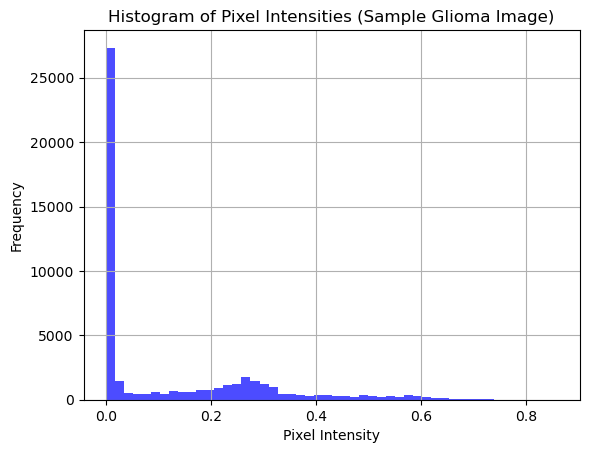

Mean Pixel Intensity: 0.1231
Variance of Pixel Intensity: 0.0280


In [2]:
#A2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to load and preprocess a single image
def load_single_image(image_path, image_size=(128, 128)):
    img = Image.open(image_path).resize(image_size)  # Resize the image
    img_array = np.array(img).astype('float32') / 255.0  # Normalize the pixel values
    return img_array

# Select one image from the glioma class for analysis
train_folder_path = r"C:\Users\manik\Downloads\ML DATASET HENRY\Training"
glioma_folder = os.path.join(train_folder_path, 'glioma')
sample_image_path = os.path.join(glioma_folder, os.listdir(glioma_folder)[0])

# Load and flatten the image (use a specific feature: pixel intensity)
sample_image = load_single_image(sample_image_path)
flattened_image = sample_image.flatten()  # Flatten the image to 1D

# Calculate histogram
hist, bin_edges = np.histogram(flattened_image, bins=50, range=(0, 1))

# Plot the histogram
plt.hist(flattened_image, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Pixel Intensities (Sample Glioma Image)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate mean and variance of the pixel intensities
mean_intensity = np.mean(flattened_image)
variance_intensity = np.var(flattened_image)

print(f"Mean Pixel Intensity: {mean_intensity:.4f}")
print(f"Variance of Pixel Intensity: {variance_intensity:.4f}")


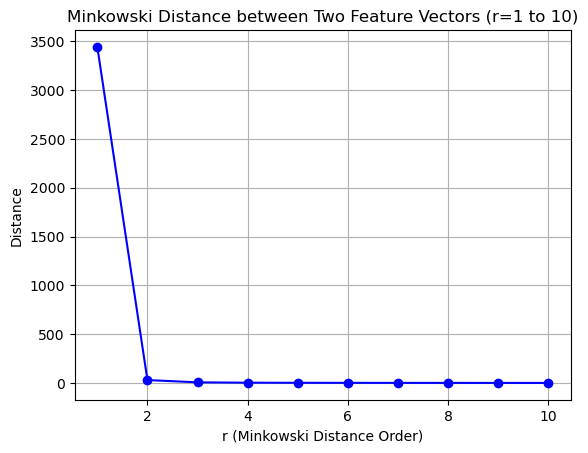

Minkowski Distance with r=1: 3442.2473
Minkowski Distance with r=2: 30.5745
Minkowski Distance with r=3: 7.1075
Minkowski Distance with r=4: 3.5850
Minkowski Distance with r=5: 2.4311
Minkowski Distance with r=6: 1.8996
Minkowski Distance with r=7: 1.6042
Minkowski Distance with r=8: 1.4199
Minkowski Distance with r=9: 1.2953
Minkowski Distance with r=10: 1.2064


In [3]:
#A3
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.spatial.distance import minkowski

# Function to load and preprocess a single image
def load_single_image(image_path, image_size=(128, 128)):
    img = Image.open(image_path).resize(image_size)  # Resize the image
    img_array = np.array(img).astype('float32') / 255.0  # Normalize the pixel values
    return img_array.flatten()  # Flatten the image to a 1D vector

# Select two images from the glioma class for analysis
train_folder_path = r"C:\Users\manik\Downloads\ML DATASET HENRY\Training"
glioma_folder = os.path.join(train_folder_path, 'glioma')
meningioma_folder = os.path.join(train_folder_path, 'meningioma')

# Load two sample images (one from glioma and one from meningioma)
image1_path = os.path.join(glioma_folder, os.listdir(glioma_folder)[0])
image2_path = os.path.join(meningioma_folder, os.listdir(meningioma_folder)[0])

image1_vector = load_single_image(image1_path)
image2_vector = load_single_image(image2_path)

# Calculate Minkowski distances for r from 1 to 10
r_values = range(1, 11)
distances = [minkowski(image1_vector, image2_vector, r) for r in r_values]

# Plot the Minkowski distances
plt.plot(r_values, distances, marker='o', color='b')
plt.title('Minkowski Distance between Two Feature Vectors (r=1 to 10)')
plt.xlabel('r (Minkowski Distance Order)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Print distances for each value of r
for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance with r={r}: {dist:.4f}")


In [4]:
#A4
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).convert('RGB')  # Ensure the image has 3 channels (RGB)
            img = img.resize(image_size)  # Resize the image to the specified size
            img_array = np.array(img).astype('float32') / 255.0  # Normalize pixel values
            images.append(img_array.flatten())  # Flatten the image to a 1D vector
            labels.append(label)  # Append the corresponding label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Folder paths for the two selected classes (glioma and meningioma)
train_folder_path = r"C:\Users\manik\Downloads\ML DATASET HENRY\Training"
glioma_folder = os.path.join(train_folder_path, 'glioma')
meningioma_folder = os.path.join(train_folder_path, 'meningioma')

# Load the glioma class (label=0) and meningioma class (label=1)
glioma_images, glioma_labels = load_images_from_folder(glioma_folder, label=0)
meningioma_images, meningioma_labels = load_images_from_folder(meningioma_folder, label=1)

# Combine the images and labels for the two classes
X = np.concatenate([glioma_images, meningioma_images], axis=0)
y = np.concatenate([glioma_labels, meningioma_labels], axis=0)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (1862, 49152)
Test data shape: (798, 49152)
Training labels shape: (1862,)
Test labels shape: (798,)


In [5]:
#A5 A6 A7
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).convert('RGB')  # Ensure 3 channels (RGB)
            img = img.resize(image_size)  # Resize the image
            img_array = np.array(img).astype('float32') / 255.0  # Normalize pixel values
            images.append(img_array.flatten())  # Flatten the image to 1D vector
            labels.append(label)  # Append corresponding label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Folder paths for the two selected classes (glioma and meningioma)
train_folder_path = r"C:\Users\manik\Downloads\ML DATASET HENRY\Training"
glioma_folder = os.path.join(train_folder_path, 'glioma')
meningioma_folder = os.path.join(train_folder_path, 'meningioma')

# Load the glioma class (label=0) and meningioma class (label=1)
glioma_images, glioma_labels = load_images_from_folder(glioma_folder, label=0)
meningioma_images, meningioma_labels = load_images_from_folder(meningioma_folder, label=1)

# Combine the images and labels for the two classes
X = np.concatenate([glioma_images, meningioma_images], axis=0)
y = np.concatenate([glioma_labels, meningioma_labels], axis=0)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Make predictions on the test set
y_pred = neigh.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier (k=3): {accuracy:.4f}")


Accuracy of kNN classifier (k=3): 0.8409


Accuracy for k=1 (Validation Set): 0.2615923009623797
Accuracy for k=1 (Test Set): 0.2288329519450801
Accuracy for k=2 (Validation Set): 0.2615923009623797
Accuracy for k=2 (Test Set): 0.2288329519450801
Accuracy for k=3 (Validation Set): 0.2615923009623797
Accuracy for k=3 (Test Set): 0.2288329519450801
Accuracy for k=4 (Validation Set): 0.2615923009623797
Accuracy for k=4 (Test Set): 0.2288329519450801
Accuracy for k=5 (Validation Set): 0.25196850393700787
Accuracy for k=5 (Test Set): 0.2288329519450801
Accuracy for k=6 (Validation Set): 0.25196850393700787
Accuracy for k=6 (Test Set): 0.2288329519450801
Accuracy for k=7 (Validation Set): 0.25196850393700787
Accuracy for k=7 (Test Set): 0.2288329519450801
Accuracy for k=8 (Validation Set): 0.25196850393700787
Accuracy for k=8 (Test Set): 0.2288329519450801
Accuracy for k=9 (Validation Set): 0.25196850393700787
Accuracy for k=9 (Test Set): 0.2288329519450801
Accuracy for k=10 (Validation Set): 0.25196850393700787
Accuracy for k=10 (Te

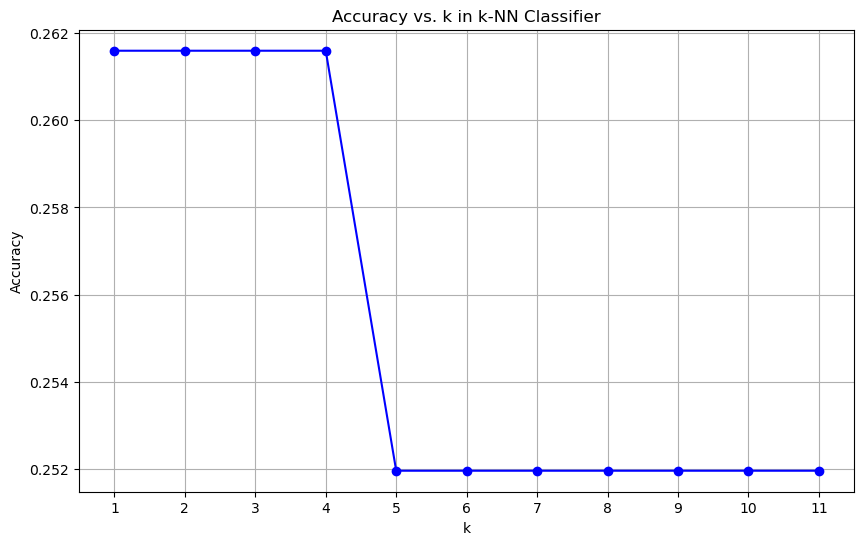

In [13]:
#A8
import zipfile
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the ZIP file and extract its contents
zip_file_path = r"C:\Users\manik\Downloads\ML DATASET HENRY.zip"  # Update this to the actual ZIP file path
extract_dir = r"C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted"  # Directory where files will be extracted

if not os.path.isfile(zip_file_path):
    raise FileNotFoundError(f"The file {zip_file_path} does not exist or is not a valid file.")

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Define paths to training and testing directories
train_dir = os.path.join(extract_dir, 'Training')
test_dir = os.path.join(extract_dir, 'Testing')

# Define classes (subfolders in the training directory)
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Initialize lists to hold feature data (X, Y) and labels
X_train = []
Y_train = []
labels = []

def extract_image_features(image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64))  # Resize to a fixed size (optional)
    width, height = img.size  # Take width and height as features
    return width, height

# Function to process images in a directory
def process_images(directory, labels_list):
    X = []
    Y = []
    y = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        images = os.listdir(class_dir)
        
        # Process each image in the class directory
        for image_name in images:
            image_path = os.path.join(class_dir, image_name)
            width, height = extract_image_features(image_path)
            X.append(width)
            Y.append(height)
            y.append(label)
    return np.array(X), np.array(Y), np.array(y)

# Process training and testing images
X_train, Y_train, labels = process_images(train_dir, labels)
X_test, Y_test, test_labels = process_images(test_dir, labels)

# Combine features for training and testing
train_data = np.column_stack((X_train, Y_train))
test_data = np.column_stack((X_test, Y_test))

# Step 3: Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, labels, test_size=0.2, random_state=42)

# Step 4: Scale the features for better performance in kNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Step 5: Train and evaluate k-NN classifiers
k_values = list(range(1, 12))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Validate on the validation set
    y_val_pred = knn.predict(X_val_scaled)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy_val)

    # Test on the test set
    y_test_pred = knn.predict(test_data_scaled)
    accuracy_test = accuracy_score(test_labels, y_test_pred)
    print(f"Accuracy for k={k} (Validation Set): {accuracy_val}")
    print(f"Accuracy for k={k} (Test Set): {accuracy_test}")

# Step 6: Plot accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k in k-NN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 165s 868ms/step - accuracy: 0.6448 - loss: 0.8768 - val_accuracy: 0.8238 - val_loss: 0.4588
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 457ms/step - accuracy: 0.8733 - loss: 0.3248 - val_accuracy: 0.8490 - val_loss: 0.4138
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 457ms/step - accuracy: 0.9320 - loss: 0.1837 - val_accuracy: 0.9375 - val_loss: 0.1886
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 422ms/step - accuracy: 0.9693 - loss: 0.0951 - val_accuracy: 0.9169 - val_loss: 0.2243
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 289ms/step - accuracy: 0.9839 - loss: 0.0490 - val_accuracy: 0.9314 - val_loss: 0.2634
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 293ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9641 - val_loss: 0.1655
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 59s 322ms/step - accuracy: 0.9918 - loss: 0.0217 - val_accuracy: 0.9710 - val_loss: 0.1361
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 306ms/step - accuracy: 0.9978 - loss: 0.0124 - va

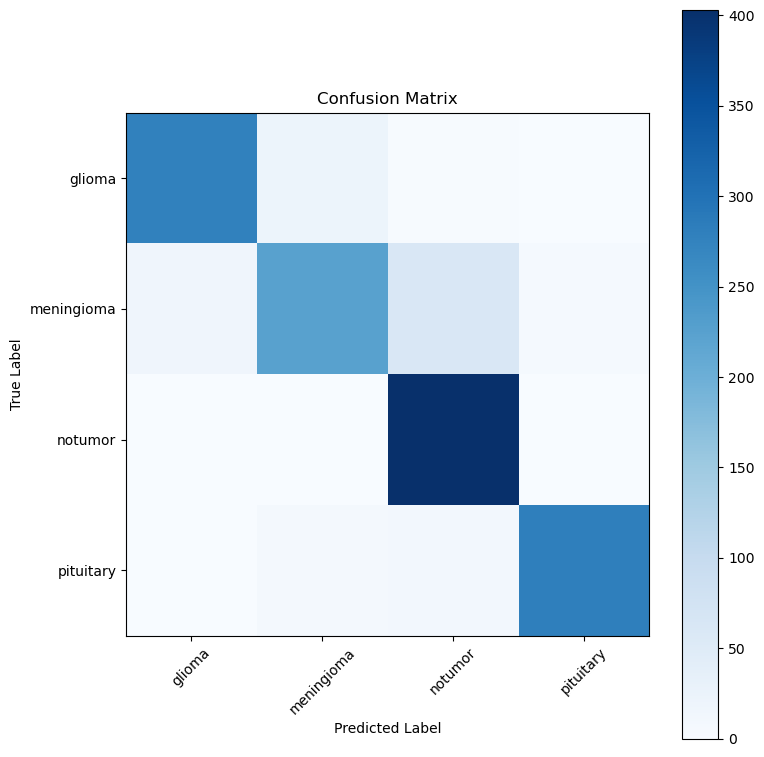

In [6]:
#A9
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the ZIP file
zip_file_path = r'C:\Users\manik\Downloads\ML DATASET HENRY.zip'
extract_dir = r'C:\Users\manik\Downloads\ML_DATASET_HENRY_Extracted'

# Ensure the extraction directory exists
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the images
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Set up directories for training and testing
train_dir = os.path.join(extract_dir, 'Training')  # Assuming 'Training' folder exists in the ZIP
test_dir = os.path.join(extract_dir, 'Testing')    # Assuming 'Testing' folder exists in the ZIP

# Step 3: ImageDataGenerator to load images
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Step 4: Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Automatically set to the number of classes
])

# Step 5: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Step 7: Evaluate and predict
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)

target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names)
print('Classification Report')
print(report)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plt.figure(figsize=(8, 8))
plot_confusion_matrix(cm, classes=target_names)
plt.show()
